# Plotting Tools

In [4]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example: 
Gathers all results in log_dir and averages together the reward over time. 
Note that this function, from the authors, average together all directories in log. Since we are experimenting, oftentimes our runs in log are from different environments and policies, so this function will only be useful towards the end of our experimenting.

2020-05-18--21:18:00
2020-05-18--21:47:47
2020-05-18--22:38:59


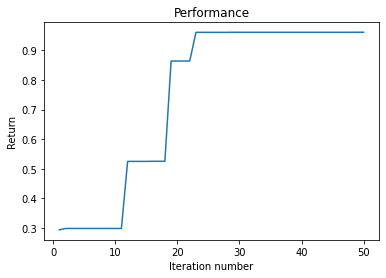

In [16]:
# Directory specified in script, not including date+time
log_dir = 'log'         
min_num_trials = 50   # Plots up to this many trials

returns = []
for subdir in os.listdir(log_dir):
    print(subdir)
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
        
returns = np.array(returns)
returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()

## Visualizing reward in a single episode
Ideally, should see that later episodes have overall higher reward curves that early episodes.


73 episodes,  each 1000 long


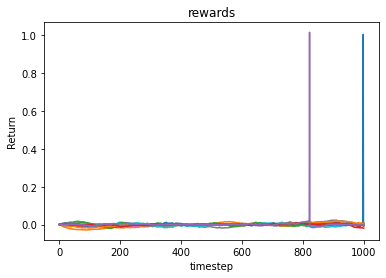

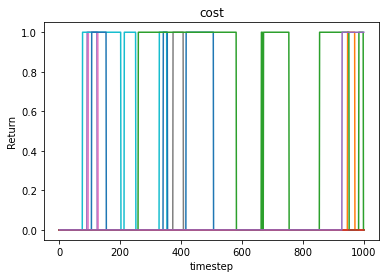

In [9]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

# Directory specified in script, not including date+time
log_dir = '/home/juliewang_jsw/handful-of-trials/log'
# filename = '2020-05-30--23:14:10/logs.mat'
filename = '2020-05-31--04:32:05/logs.mat'

data = loadmat(os.path.join(log_dir, filename))
avg_reward = np.mean(data['rewards'], axis=0)
N, task_horizon = data['rewards'].shape
print(f"{N} episodes,  each {task_horizon} long")

# Plot rewards and cost over time for a subsequent episdoes
for item in ['rewards', 'cost']:
    if len(data[item]) > 0:
        plt.figure()
        for i in range(0, N, 5):
            plt.plot(np.arange(1, task_horizon+1), data[item][i, :], label=f'{i}th episode')
        plt.title(item)
        plt.xlabel("timestep")
        plt.ylabel("Return")
#         plt.legend()
        plt.show()


## Visualizing return vs. iteration
Ideally want to see the reward increasing as training proceeds

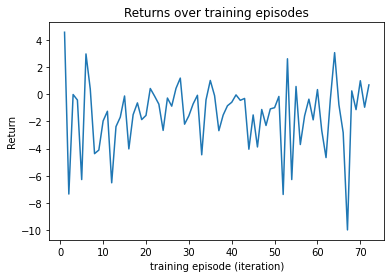

In [10]:
total_reward = data['returns'][0]
episodes = len(total_reward)

plt.figure()
plt.plot(np.arange(1, episodes+1), total_reward)
plt.title("Returns over training episodes")
plt.xlabel("training episode (iteration)")
plt.ylabel("Return")
plt.show()